In [1]:
import pandas as pd
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_paths = ['result tables\\cambridgeshire.csv', 'result tables\\cornwall.csv', 'result tables\\devon.csv', 'result tables\\dorset.csv', 'result tables\\herefordshire.csv', 'result tables\\kent.csv', 'result tables\\lincolnshire.csv', 'result tables\\norfolk.csv', 'result tables\\northamptonshire.csv', 'result tables\\somerset.csv', 'result tables\\westsussex.csv', 'result tables\\yorkshire.csv']

dataframes = {}
for file_path in file_paths:
    file_name = file_path.split("\\")[-1].split(".")[0]
    dataframes[file_name] = pd.read_csv(file_path)
results = pd.DataFrame()

for file_name, df in dataframes.items():
    df['county'] = file_name
    results = results.append(df, ignore_index=True)
results["county"] = results["county"].str.capitalize()
results['instance'] = results['FBL'].map({0: 'no FBL', 1: 'FBL'})
results.head()

,OID_,gid,crop_code,parent,poly_id,crop_name,area,FBL,confidence,county,instance
0,1,111090,or,0,354893,Oilseed rape,89691.515625,1,0.711106,Cambridgeshire,FBL
1,2,555272,or,34328,0,Oilseed rape,116931.851562,1,0.630441,Cambridgeshire,FBL
2,4,2089128,or,0,353022,Oilseed rape,196203.328125,1,0.668220,Cambridgeshire,FBL
3,5,1531950,or,0,1960546,Oilseed rape,40283.910156,0,0.699681,Cambridgeshire,no FBL
4,6,103153,or,0,34602,Oilseed rape,323835.000000,1,0.883522,Cambridgeshire,FBL


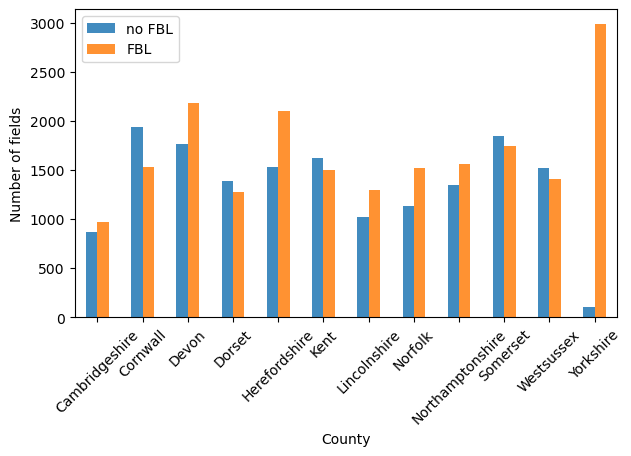

In [41]:
summary = results.groupby(['county', 'FBL']).size().unstack()
ax = summary.plot(kind='bar',figsize=(7, 4),alpha=0.85)
ax.set_xticklabels(summary.index, rotation=45)
plt.xlabel('County')
plt.ylabel('Number of fields')
plt.legend(['no FBL', 'FBL'], loc='upper left')

In [10]:
area_mean = results.groupby('county')['area'].mean() #sum()
area_sum_km_table = pd.DataFrame(area_mean) #/1000000
area_sum_km_table.columns = ['Area (m^2)']
#print(area_sum_km_table)
#results['area'].mean()

grouped_data = results.groupby(['county', 'FBL']).size().unstack()
table = grouped_data.reset_index()
table.columns.name = None
table['Percentage of Label 1'] = (table[1] / table.sum(axis=1)) * 100
#print(table)

confidence_mean = results.groupby('county')['confidence'].mean()
confidence_mean_table = pd.DataFrame(confidence_mean)
confidence_mean_table.columns = ['Confidence']
#print(confidence_mean_table)
#confidence_mean_table


c:\Users\44793\anaconda3\envs\Machine_Learning\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


confidence in no FBL prediction: 0.8053342541351142
confidence in FBL prediction: 0.8272273055855709


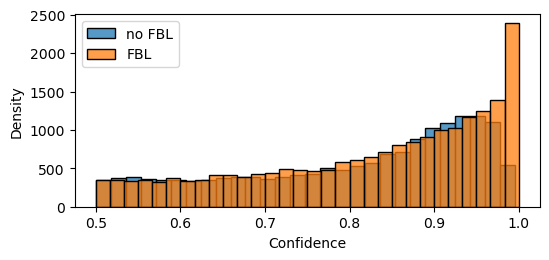

Strong negative skew
Wilcoxon rank-sum test statistic: -18.46855175719423
p-value: 3.69874552385854e-76


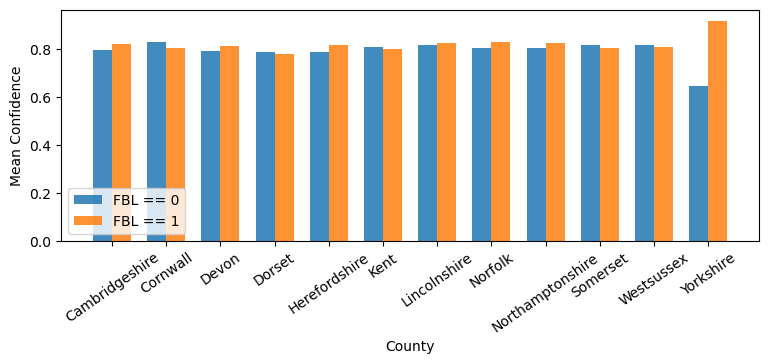

In [169]:
# exporing the differences in the confidence of predictions for both labels
from scipy import stats
no_FBL_confidence_mean = results[results['FBL'] == 0]['confidence'].mean()
FBL_confidence_mean = results[results['FBL'] == 1]['confidence'].mean()
print(f"confidence in no FBL prediction: {no_FBL_confidence_mean}")
print(f"confidence in FBL prediction: {FBL_confidence_mean}")
no_FBL_confidence = results[results['FBL'] == 0]['confidence']
FBL_confidence = results[results['FBL'] == 1]['confidence']
# testing distribution of confidence values
import seaborn as sns
plt.figure(figsize=(6, 2.5))
sns.histplot(list(no_FBL_confidence), label='no FBL')
sns.histplot(list(FBL_confidence), label='FBL')
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend()
plt.show()
print("Strong negative skew")
# running non-parametric "Wilcoxon rank-sum" test
from scipy.stats import ranksums
no_FBL_confidence = results[results['FBL'] == 0]['confidence']
FBL_confidence = results[results['FBL'] == 1]['confidence']
statistic, p_value = ranksums(no_FBL_confidence, FBL_confidence)
print(f"Wilcoxon rank-sum test statistic: {statistic}")
print(f"p-value: {p_value}")
# Mean confidence level of each prediction by county
mean_confidence_fbl_0 = results[results['FBL'] == 0].groupby('county')['confidence'].mean()
mean_confidence_fbl_1 = results[results['FBL'] == 1].groupby('county')['confidence'].mean()
plt.figure(figsize=(9, 3))
x = np.arange(len(mean_confidence_fbl_0))
width = 0.35
plt.bar(x - width/2, mean_confidence_fbl_0, width, alpha=0.85, label='FBL == 0')
plt.bar(x + width/2, mean_confidence_fbl_1, width, alpha=0.85, label='FBL == 1')
plt.xlabel('County')
plt.ylabel('Mean Confidence')
plt.xticks(x, mean_confidence_fbl_0.index)
plt.xticks(rotation=35)
plt.legend(loc='lower left')
plt.show()

confidence in no FBL prediction: 47899.862423833176
confidence in FBL prediction: 71440.16873642229


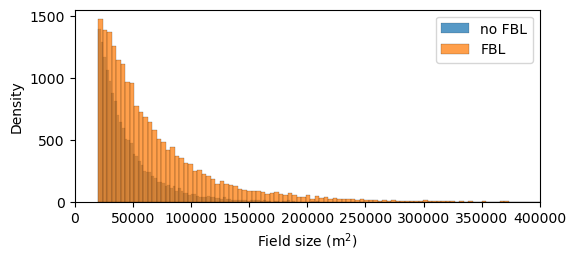

Long-tailed positive skew
Wilcoxon rank-sum test statistic: -48.43003304597161
p-value: 0.0


Text(0, 0.5, 'Field size (m$^2$)')

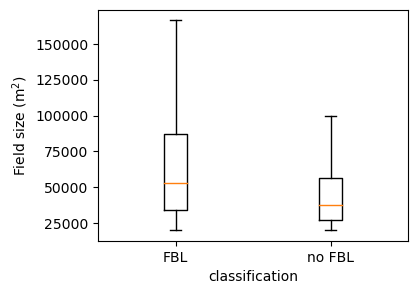

In [170]:
# exploring difference in area between the two
no_FBL_area_mean = results[results['FBL'] == 0]['area'].mean()
FBL_area_mean = results[results['FBL'] == 1]['area'].mean()
print(f"confidence in no FBL prediction: {no_FBL_area_mean}")
print(f"confidence in FBL prediction: {FBL_area_mean}")
no_FBL_area = results[results['FBL'] == 0]['area']
FBL_area = results[results['FBL'] == 1]['area']

plt.figure(figsize=(6, 2.5))
sns.histplot(list(no_FBL_area), label='no FBL')
sns.histplot(list(FBL_area), label='FBL')
plt.xlabel('Field size (m$^2$)')
plt.ylabel('Density')
plt.xlim(0,400000)
plt.legend()
plt.show()
print("Long-tailed positive skew")
# running non-parametric "Wilcoxon rank-sum" test
no_FBL_size = results[results['FBL'] == 0]['area']
FBL_size = results[results['FBL'] == 1]['area']
statistic, p_value = ranksums(no_FBL_size, FBL_size)
print(f"Wilcoxon rank-sum test statistic: {statistic}")
print(f"p-value: {p_value}")

plt.figure(figsize=(4, 3))
plt.boxplot([results[results["instance"] == "FBL"]["area"], results[results["instance"] == "no FBL"]["area"]], showfliers=False)
plt.xticks([1, 2], ["FBL", "no FBL"])
plt.xlabel("classification")
plt.ylabel("Field size (m$^2$)")

confidence in no FBL prediction: 47899.862423833176
confidence in FBL prediction: 71440.16873642229


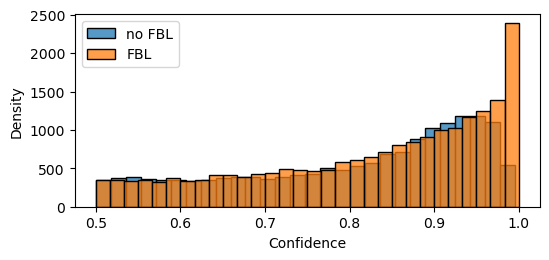

Wilcoxon rank-sum test statistic: -48.43003304597161
p-value: 0.0


Ttest_indResult(statistic=44.74881907308152, pvalue=0.0)

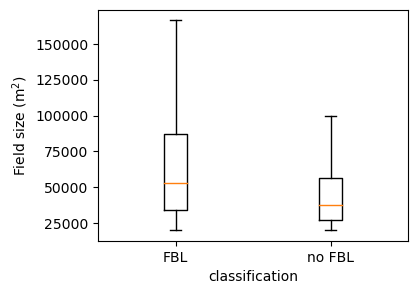

In [172]:
#look at distribution of both groups data
no_FBL_area_mean = results[results['FBL'] == 0]['area'].mean()
FBL_area_mean = results[results['FBL'] == 1]['area'].mean()
print(f"confidence in no FBL prediction: {no_FBL_area_mean}")
print(f"confidence in FBL prediction: {FBL_area_mean}")
no_FBL_area = results[results['FBL'] == 0]['area']
FBL_area = results[results['FBL'] == 1]['area']
# testing distribution of confidence values
import seaborn as sns
plt.figure(figsize=(6, 2.5))
sns.histplot(list(no_FBL_confidence), label='no FBL')
sns.histplot(list(FBL_confidence), label='FBL')
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend()
plt.show()

# running non-parametric "Wilcoxon rank-sum" test

no_FBL_size = results[results['FBL'] == 0]['area']
FBL_size = results[results['FBL'] == 1]['area']
statistic, p_value = ranksums(no_FBL_size, FBL_size)
print(f"Wilcoxon rank-sum test statistic: {statistic}")
print(f"p-value: {p_value}")

plt.figure(figsize=(4, 3))
plt.boxplot([results[results["instance"] == "FBL"]["area"], results[results["instance"] == "no FBL"]["area"]], showfliers=False)
plt.xticks([1, 2], ["FBL", "no FBL"])
plt.xlabel("classification")
plt.ylabel("Field size (m$^2$)")
#t-test
fbl_area = results[results["instance"] == "FBL"]["area"]
no_fbl_area = results[results["instance"] == "no FBL"]["area"]
stats.ttest_ind(fbl_area, no_fbl_area)


Text(0, 0.5, 'Mean Field Size (m$^2$)')

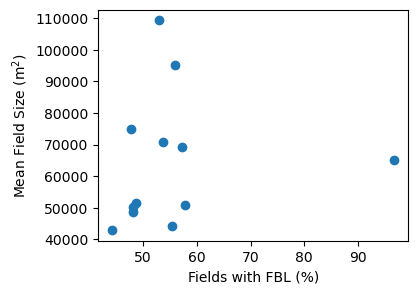

In [69]:
mean_area = results.groupby("county")["area"].mean()
percentage_fbl = results.groupby("county")["FBL"].mean() * 100 # Calculate the percentage of fiels with FBL
plt.figure(figsize=(4, 3))
plt.scatter(percentage_fbl, mean_area)
plt.xlabel("Fields with FBL (%)")
plt.ylabel("Mean Field Size (m$^2$)")

In [70]:
unique_strings = results["crop_name"].unique()
print(unique_strings)


['Oilseed rape' 'Peas' 'Grass' 'Other crops'
 'Beet (sugar beet / fodder beet)' 'Maize' 'Spring barley' 'Spring wheat'
 'Winter barley' 'Winter oats' 'Winter wheat' 'Spring oats' 'Solar panels'
 'Spring field beans' 'Winter field beans' 'Potatoes']


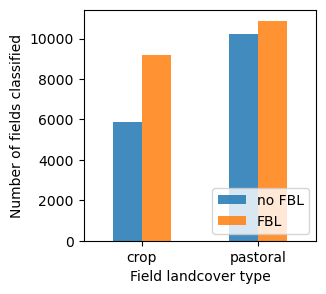

Percentage of pastoral fields with FBL: 51.59806525037936%
Percentage of crop fields with FBL: 61.04774535809019%


In [191]:

results_copy = results.copy()
results_copy['crop_name'] = results_copy['crop_name'].apply(lambda x: 'pastoral' if x == 'Grass' else 'crop')
grouped = results_copy.groupby(["crop_name", "FBL"]).size().unstack()
grouped.plot(kind="bar",alpha=0.85, figsize=(3, 3), stacked=False)
plt.xlabel("Field landcover type")
plt.ylabel("Number of fields classified")
plt.legend(["no FBL", "FBL"], loc='lower right')
plt.xticks(rotation=360)
plt.show()
percentage_pastoral_fbl = (grouped.loc['pastoral', 1] / grouped.loc['pastoral'].sum()) * 100
print(f"Percentage of pastoral fields with FBL: {percentage_pastoral_fbl}%")
percentage_FBL = (grouped.loc['crop', 1] / grouped.loc['crop'].sum()) * 100
print(f"Percentage of crop fields with FBL: {percentage_FBL}%")

#Almost 10% more modern-day crop fields experienced 19th century FLB than pastoral fields

### Removing all data entries that have a confidence of < x (e.g. x=.70) and all of Yorkshire's predictions, then run statistical analysis again. 

In [11]:
results.head()

,OID_,gid,crop_code,parent,poly_id,crop_name,area,FBL,confidence,county,instance
0,1,111090,or,0,354893,Oilseed rape,89691.515625,1,0.711106,Cambridgeshire,FBL
1,2,555272,or,34328,0,Oilseed rape,116931.851562,1,0.630441,Cambridgeshire,FBL
2,4,2089128,or,0,353022,Oilseed rape,196203.328125,1,0.668220,Cambridgeshire,FBL
3,5,1531950,or,0,1960546,Oilseed rape,40283.910156,0,0.699681,Cambridgeshire,no FBL
4,6,103153,or,0,34602,Oilseed rape,323835.000000,1,0.883522,Cambridgeshire,FBL


37.97% of field images have a prediction confidence of 90% or more (13733 images)


c:\Users\44793\anaconda3\envs\Machine_Learning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


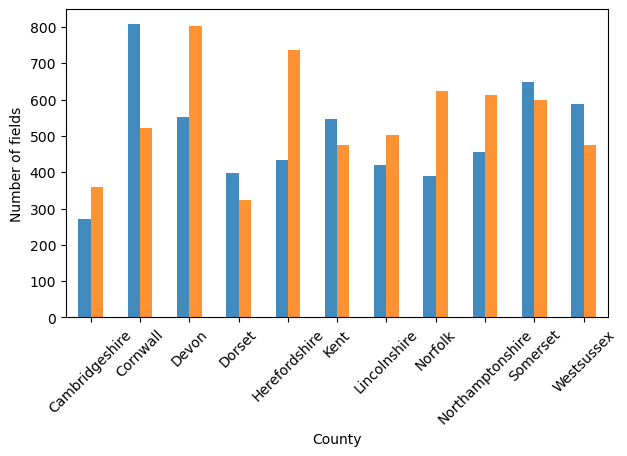

In [46]:
conf_90 = len(results[results['confidence'] > 0.9])
conf_90_percent = round((conf_90 / len(results)) * 100, 2)
print(f"{conf_90_percent}% of field images have a prediction confidence of 90% or more ({conf_90} images)") 

best_results = results[results['confidence'] >= 0.9] # filter out confience < 90%
best_results = best_results[results['county'] != 'Yorkshire'] # remove Yorkshire's field images
best_results

grouped_data = best_results.groupby(['county', 'FBL']).size().unstack()
ax = grouped_data.plot(kind='bar',figsize=(7, 4), alpha=0.85)
ax.set_xticklabels(grouped_data.index, rotation=45)
plt.xlabel('County')
plt.ylabel('Number of fields')
#plt.legend(['no FBL', 'FBL'], loc='upper left')
ax.get_legend().remove()

confidence in no FBL prediction: 0.8063551901524983
confidence in FBL prediction: 0.8114359723071781


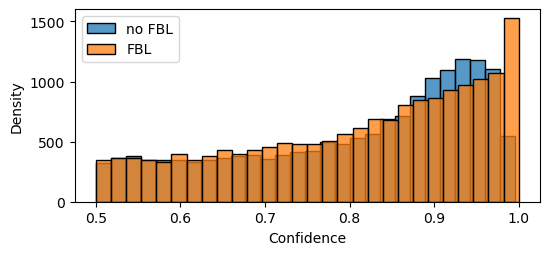

Strong negative skew
Wilcoxon rank-sum test statistic: -5.026918157624333
p-value: 4.984249414378758e-07


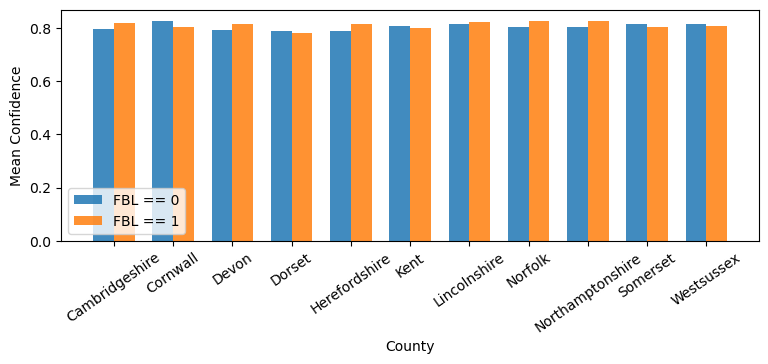

In [179]:
# exporing the differences in the confidence of predictions for both labels
from scipy import stats
no_FBL_confidence_mean = best_results[best_results['FBL'] == 0]['confidence'].mean()
FBL_confidence_mean = best_results[best_results['FBL'] == 1]['confidence'].mean()
print(f"confidence in no FBL prediction: {no_FBL_confidence_mean}")
print(f"confidence in FBL prediction: {FBL_confidence_mean}")
no_FBL_confidence = best_results[best_results['FBL'] == 0]['confidence']
FBL_confidence = best_results[best_results['FBL'] == 1]['confidence']
# testing distribution of confidence values
import seaborn as sns
plt.figure(figsize=(6, 2.5))
sns.histplot(list(no_FBL_confidence), label='no FBL')
sns.histplot(list(FBL_confidence), label='FBL')
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend()
plt.show()
print("Strong negative skew")
# running non-parametric "Wilcoxon rank-sum" test
from scipy.stats import ranksums
no_FBL_confidence = best_results[best_results['FBL'] == 0]['confidence']
FBL_confidence = best_results[best_results['FBL'] == 1]['confidence']
statistic, p_value = ranksums(no_FBL_confidence, FBL_confidence)
print(f"Wilcoxon rank-sum test statistic: {statistic}")
print(f"p-value: {p_value}")
# Mean confidence level of each prediction by county
mean_confidence_fbl_0 = best_results[best_results['FBL'] == 0].groupby('county')['confidence'].mean()
mean_confidence_fbl_1 = best_results[best_results['FBL'] == 1].groupby('county')['confidence'].mean()
plt.figure(figsize=(9, 3))
x = np.arange(len(mean_confidence_fbl_0))
width = 0.35
plt.bar(x - width/2, mean_confidence_fbl_0, width, alpha=0.85, label='FBL == 0')
plt.bar(x + width/2, mean_confidence_fbl_1, width, alpha=0.85, label='FBL == 1')
plt.xlabel('County')
plt.ylabel('Mean Confidence')
plt.xticks(x, mean_confidence_fbl_0.index)
plt.xticks(rotation=35)
plt.legend(loc='lower left')
plt.show()

confidence in no FBL prediction: 45704.53455233326
confidence in FBL prediction: 85217.27926946322


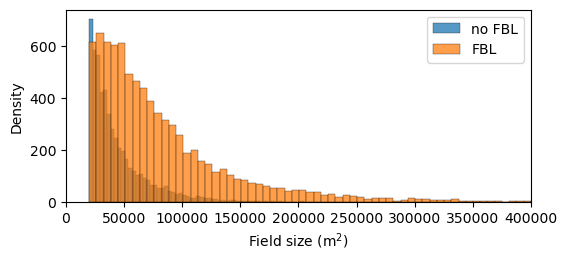

Long-tailed positive skew
Wilcoxon rank-sum test statistic: -46.37297362010287
p-value: 0.0


Text(0, 0.5, 'Field size (m$^2$)')

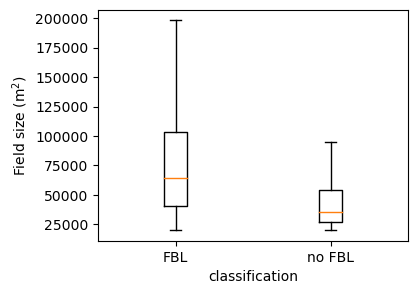

In [174]:
# exploring difference in field size of fields with and without FBL
no_FBL_area_mean = best_results[best_results['FBL'] == 0]['area'].mean()
FBL_area_mean = best_results[best_results['FBL'] == 1]['area'].mean()
print(f"confidence in no FBL prediction: {no_FBL_area_mean}")
print(f"confidence in FBL prediction: {FBL_area_mean}")
no_FBL_area = best_results[best_results['FBL'] == 0]['area']
FBL_area = best_results[best_results['FBL'] == 1]['area']

plt.figure(figsize=(6, 2.5))
sns.histplot(list(no_FBL_area), label='no FBL')
sns.histplot(list(FBL_area), label='FBL')
plt.xlabel('Field size (m$^2$)')
plt.ylabel('Density')
plt.xlim(0,400000)
plt.legend()
plt.show()
print("Long-tailed positive skew")
# running non-parametric "Wilcoxon rank-sum" test
no_FBL_size = best_results[best_results['FBL'] == 0]['area']
FBL_size = best_results[best_results['FBL'] == 1]['area']
statistic, p_value = ranksums(no_FBL_size, FBL_size)
print(f"Wilcoxon rank-sum test statistic: {statistic}")
print(f"p-value: {p_value}")

plt.figure(figsize=(4, 3))
plt.boxplot([best_results[best_results["instance"] == "FBL"]["area"], best_results[best_results["instance"] == "no FBL"]["area"]], showfliers=False)
plt.xticks([1, 2], ["FBL", "no FBL"])
plt.xlabel("classification")
plt.ylabel("Field size (m$^2$)")

confidence in no FBL prediction: 45704.53455233326
confidence in FBL prediction: 85217.27926946322


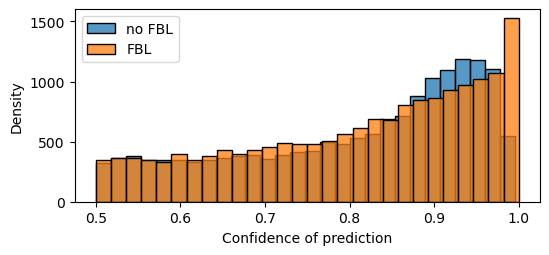

Wilcoxon rank-sum test statistic: -18.46855175719423
p-value: 3.69874552385854e-76


Ttest_indResult(statistic=14.594352243596132, pvalue=4.181893923287298e-48)

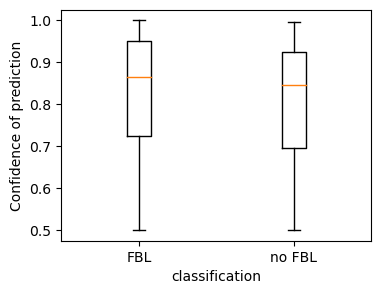

In [198]:
#look at distribution of confidence of prediction for both labels

no_FBL_area_confidence = results[results['FBL'] == 0]['confidence'].mean()
FBL_area_confidence = results[results['FBL'] == 1]['confidence'].mean()
print(f"confidence in no FBL prediction: {no_FBL_area_mean}")
print(f"confidence in FBL prediction: {FBL_area_mean}")
no_FBL_area = results[results['FBL'] == 0]['confidence']
FBL_area = results[results['FBL'] == 1]['confidence']
# testing distribution of confidence values
import seaborn as sns
plt.figure(figsize=(6, 2.5))
sns.histplot(list(no_FBL_confidence), label='no FBL')
sns.histplot(list(FBL_confidence), label='FBL')
plt.xlabel('Confidence of prediction')
plt.ylabel('Density')
plt.legend()
plt.show()

# running non-parametric "Wilcoxon rank-sum" test

no_FBL_size = results[results['FBL'] == 0]['confidence']
FBL_size = results[results['FBL'] == 1]['confidence']
statistic, p_value = ranksums(no_FBL_size, FBL_size)
print(f"Wilcoxon rank-sum test statistic: {statistic}")
print(f"p-value: {p_value}")

plt.figure(figsize=(4, 3))
plt.boxplot([results[results["instance"] == "FBL"]["confidence"], results[results["instance"] == "no FBL"]["confidence"]], showfliers=False)
plt.xticks([1, 2], ["FBL", "no FBL"])
plt.xlabel("classification")
plt.ylabel("Confidence of prediction")

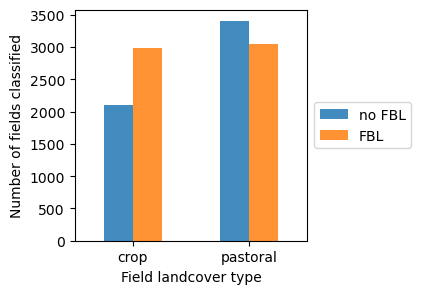

Percentage of pastoral fields with FBL: 47.25019364833463%
Percentage of crop fields with FBL: 58.61662409117705%


In [54]:

best_results_copy = best_results.copy()
best_results_copy['crop_name'] = best_results_copy['crop_name'].apply(lambda x: 'pastoral' if x == 'Grass' else 'crop')
grouped = best_results_copy.groupby(["crop_name", "FBL"]).size().unstack()
grouped.plot(kind="bar", alpha=0.85, figsize=(3, 3), stacked=False)
plt.xlabel("Field landcover type")
plt.ylabel("Number of fields classified")
plt.legend(["no FBL", "FBL"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=360)
plt.show()
percentage_pastoral_fbl = (grouped.loc['pastoral', 1] / grouped.loc['pastoral'].sum()) * 100
print(f"Percentage of pastoral fields with FBL: {percentage_pastoral_fbl}%")
percentage_FBL = (grouped.loc['crop', 1] / grouped.loc['crop'].sum()) * 100
print(f"Percentage of crop fields with FBL: {percentage_FBL}%")

# after filtering bad predictions, the difference in loss between pastoral and arable fields grew smaller with a 7.09% difference in FBL predictions across both.


,OID_,gid,crop_code,parent,poly_id,crop_name,area,FBL,confidence,county,instance
6,10,2632400,or,0,353898,crop,132361.031250,1,0.925100,Cambridgeshire,FBL
7,11,643924,or,0,34604,crop,329830.062500,1,0.955730,Cambridgeshire,FBL
8,12,562335,or,353168,0,crop,238983.375000,1,0.989748,Cambridgeshire,FBL
9,13,996991,or,0,352197,crop,144581.171875,1,0.932413,Cambridgeshire,FBL
10,14,746877,or,0,4946180,crop,36645.726562,0,0.939273,Cambridgeshire,no FBL
...,...,...,...,...,...,...,...,...,...,...,...
33069,3223,1551613,fs,0,4093272,crop,25024.000000,1,0.988745,Westsussex,FBL
33071,3225,2110264,fs,0,229516,crop,69054.000000,0,0.953614,Westsussex,no FBL
33077,3232,1076675,fw,0,239106,crop,127120.000000,1,0.917132,Westsussex,FBL
33078,3233,771801,fw,0,1466864,crop,39037.000000,0,0.976360,Westsussex,no FBL


In [33]:
results_copy = results.copy()
results_copy['crop_name'] = results_copy['crop_name'].apply(lambda x: 'pastoral' if x == 'Grass' else 'crop')
results_copy


,OID_,gid,crop_code,parent,poly_id,crop_name,area,FBL,confidence,county,instance
0,1,111090,or,0,354893,crop,89691.515625,1,0.711106,Cambridgeshire,FBL
1,2,555272,or,34328,0,crop,116931.851562,1,0.630441,Cambridgeshire,FBL
2,4,2089128,or,0,353022,crop,196203.328125,1,0.668220,Cambridgeshire,FBL
3,5,1531950,or,0,1960546,crop,40283.910156,0,0.699681,Cambridgeshire,no FBL
4,6,103153,or,0,34602,crop,323835.000000,1,0.883522,Cambridgeshire,FBL
...,...,...,...,...,...,...,...,...,...,...,...
36163,3504,228127,fs,0,447794,crop,79029.000000,1,0.942014,Yorkshire,FBL
36164,3505,2545722,fw,0,2328976,crop,36314.000000,1,0.995253,Yorkshire,FBL
36165,3507,1855806,fw,0,2331890,crop,48527.000000,1,0.999883,Yorkshire,FBL
36166,3508,2075970,fw,0,448602,crop,130677.000000,1,0.994541,Yorkshire,FBL


In [36]:
crop_count_table = pd.crosstab(results_copy['county'], results_copy['crop_name'])
crop_count_table = crop_count_table[['crop', 'pastoral']]
crop_count_table


crop_name,crop,pastoral
county,,
Cambridgeshire,1317,524
Cornwall,1218,2252
Devon,945,3007
Dorset,1248,1419
Herefordshire,1528,2104
Kent,866,2263
Lincolnshire,1853,459
Norfolk,1735,918
Northamptonshire,1188,1716


In [27]:

crop_count_table = best_results_copy.groupby(['county', 'crop_name']).size().reset_index(name='count')

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)



,county,crop,grass
0,Cambridgeshire,504,126
1,Cornwall,516,814
2,Devon,320,1035
3,Dorset,385,335
4,Herefordshire,525,647
5,Kent,308,714
6,Lincolnshire,768,155
7,Norfolk,741,272
8,Northamptonshire,502,568
9,Somerset,334,912


In [2]:
import pandas as pd

df = pd.read_csv('field_size_arable_rate.csv')
df

,County,field size,FBL rate,percent arable
0,Cambridgeshire,"133,754.60",56.8,80.0
1,Cornwall,"45,251.60",39.2,38.8
2,Devon,"50,078.20",59.3,23.6
3,Dorset,"81,460.60",44.9,53.5
4,Herefordshire,"57,583.20",63.0,44.8
5,Kent,"57,237.00",46.5,30.1
6,Lincolnshire,"103,852.30",54.4,83.2
7,Norfolk,"83,184.20",61.6,73.1
8,Northamptonshire,"87,582.70",57.4,46.9
9,Somerset,"57,726.60",48.0,26.8


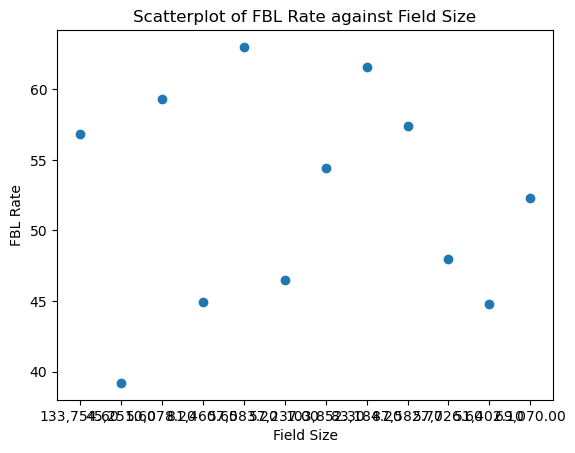

Intercept: 44.56
Slope: 0.00
R-squared: 0.13


In [5]:

plt.scatter(df['field size'], df['FBL rate'])
plt.xlabel('Field Size')
plt.ylabel('FBL Rate')
plt.title('Scatterplot of FBL Rate against Field Size')
plt.show()
import statsmodels.api as sm

# Convert the 'field size' column to numeric
df['field size'] = df['field size'].str.replace(',', '').astype(float)

# Add a constant column for the intercept term
X = sm.add_constant(df['field size'])
y = df['FBL rate']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared
print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R-squared: {r_squared:.2f}")


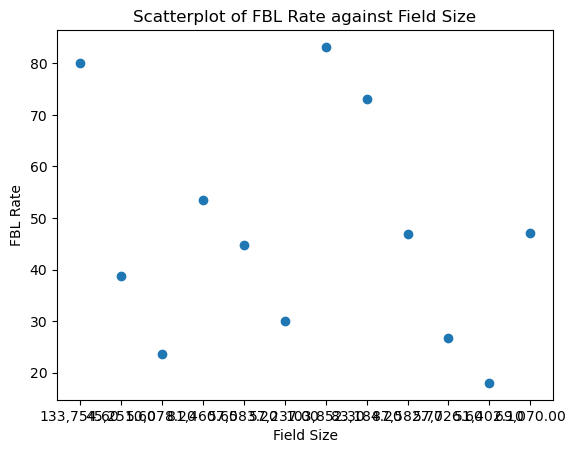

In [4]:
plt.scatter(df['field size'], df['percent arable'])
plt.xlabel('Field Size')
plt.ylabel('FBL Rate')
plt.title('Scatterplot of FBL Rate against Field Size')
plt.show()